# Lab 1: Python and differential equations

In this notebook we will use Python to solve some differential equations, and to visualise the solutions. We will build on this work in later labs to do more sophisticated analyses, and to consider more complicated differential equations.

For now, we will see how to use Python in 4 ways:

|                Method of solution: | Symbolic | Numerical |
|-----------------------------------:|----------|-----------|
| First order ODEs                   |    §1    |     §3    |
| Systems of first order ODEs        |    §2    |     §4    |

### How to use this notebook
The notebook is made up of various "cells" which either contain Python code or formatted text.

To execute the code blocks, click on them and press <kbd>>| Run</kbd> on the toolbar above, or type <kbd>Shift</kbd>+<kbd>Enter</kbd>.

[Further help on editing notebooks](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb#Overview-of-the-Notebook-UI)

# 1. Symbolic solution of ODEs

We can use Python to find the exact symbolic solution to ODEs that we might otherwise solve by hand.

To show this in action, we will solve a simple example from the textbook, of a first-order linear ODE. The following is Example 3 on p35 of Boyce and DiPrima (10th Edition).

***
### Example
Find the general solution of the first-order differential equation $$\frac{dy}{dt}-2y=4-t$$ and plot the graphs of several solutions.
***

We will use the [SymPy package](https://www.sympy.org/en/index.html) to do the calculations. The first step is to solve the equation -- we do that in the following block of code. Read the code carefully and see if you can make sense of it, then see below for a detailed walk through the code.

In [1]:
import sympy as sym
from sympy import latex
sym.init_printing()
from IPython.display import display_latex

# Define the equation
t = sym.symbols('t')
y = sym.Function('y')
eq1 = sym.Eq(y(t).diff(t)-2*y(t), 4-t)
print("The equation")
display_latex(eq1)

# Solve the equation
eq1sol = sym.dsolve(eq1, y(t))
print("has solutions")
display_latex(eq1sol)
print(latex(eq1sol))

print("or equivalently")
display_latex(sym.simplify(eq1sol))

The equation


has solutions


y{\left(t \right)} = C_{1} e^{2 t} + \frac{t}{2} - \frac{7}{4}
or equivalently


#### Detailed explanation

First, we load up the package and adjust some settings so that the output prints nicely (e.g. like $x^2$ rather than `x ** 2`):

In [2]:
import sympy as sym
sym.init_printing()
from IPython.display import display_latex

Now that we have imported the SymPy package, we can make use of its functions to do things. An example of that was `sym.init_printing()` which called the [init_printing](https://docs.sympy.org/latest/tutorial/printing.html) function to set up the way output is printed.

Conveniently, SymPy has the function [dsolve](https://docs.sympy.org/latest/modules/solvers/ode.html) which can be used to solve ODEs -- but first, we need to set up the ODE as an object that SymPy can understand.

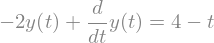

In [3]:
t = sym.symbols('t')
y = sym.Function('y')
eq1 = sym.Eq(y(t).diff(t)-2*y(t), 4-t)
eq1

There are some important things going on here:

* to use variables like $x$, $y$ and $t$ with SymPy, you need to first define these as symbols (for variables like $t$) or Functions (like $y$ here, which is a function of $t$).

* to write the equation, we use `sym.Eq(A,B)` to stand for $A=B$.

* the derivative $\frac{dy}{dt}$ is expressed as `y(t).diff(t)`, which you can think of as saying "take `y(t)` and then `diff`erentiate with respect to `t`". This is actually just a shorter way of using SymPy's `diff` function -- either way works:

In [4]:
y(t).diff(t) == sym.diff(y(t), t)

True

We're now ready to use `dsolve`:

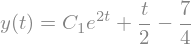

In [5]:
eq1sol = sym.dsolve(eq1, y(t))
eq1sol

This does not quite look like the solution shown in Boyce & DiPrima, but that's only because the solution has been factorised in a strange way. We can use SymPy's [simplify](https://docs.sympy.org/latest/tutorial/simplification.html) function to sort this out:

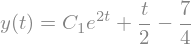

In [6]:
sym.simplify(eq1sol)

This looks more like it.

### Plotting solutions

Now, we plot one possible solution, with the initial condition $y(0)=0$:

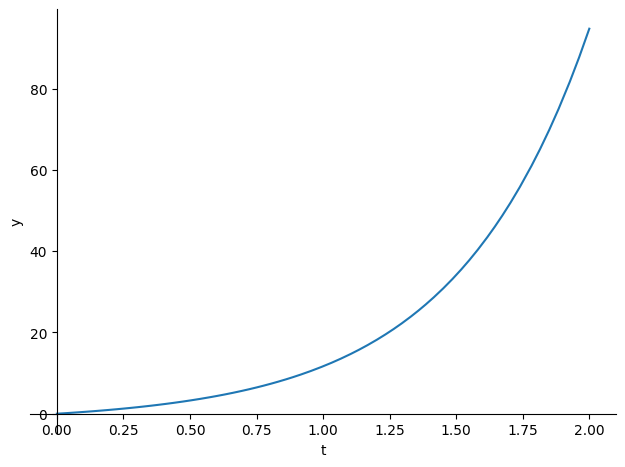

In [7]:
import sympy.plotting as sym_plot
eq1sol0 = sym.dsolve(eq1, y(t), ics={y(0):0})
display_latex(sym.simplify(eq1sol0))
sym_plot.plot(eq1sol0.rhs, (t,0,2), xlabel = 't', ylabel = 'y')

<span class="label label-danger">Task</span>
Copy the plotting code into the box below, and modify it to produce a plot of the solution with $y(0)=-1$.

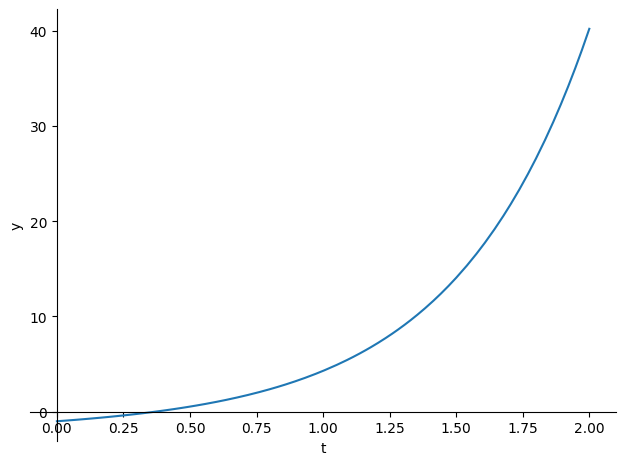

In [8]:
import sympy.plotting as sym_plot
eq1sol0 = sym.dsolve(eq1, y(t), ics={y(0):-1})
display_latex(sym.simplify(eq1sol0))
sym_plot.plot(eq1sol0.rhs, (t,0,2), xlabel = 't', ylabel = 'y')

To plot several solutions, we need to pick different choices of initial condition.

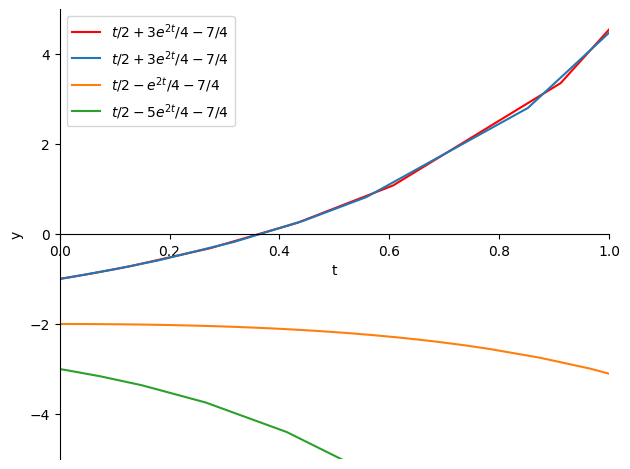

In [9]:
eq1sol1 = sym.dsolve(eq1, y(t), ics={y(0):-1})
eq1sol2 = sym.dsolve(eq1, y(t), ics={y(0):-2})
eq1sol3 = sym.dsolve(eq1, y(t), ics={y(0):-3})

p = sym_plot.plot(
    eq1sol0.rhs, eq1sol1.rhs, eq1sol2.rhs, eq1sol3.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)

p[0].line_color = 'red'
p.show()

<span class="label label-danger">Task</span>

**(a)** Change the plotting region to $0\leq t\leq1$ to get a better look at the behaviour near $t=0$.

**(b)** Add the optional argument `legend = True` to the `plot` function to show which curves are being plotted.

**(c)** (Challenge) See if you can find how to give each curve a different colour, something like this:

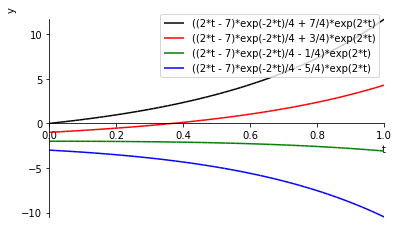

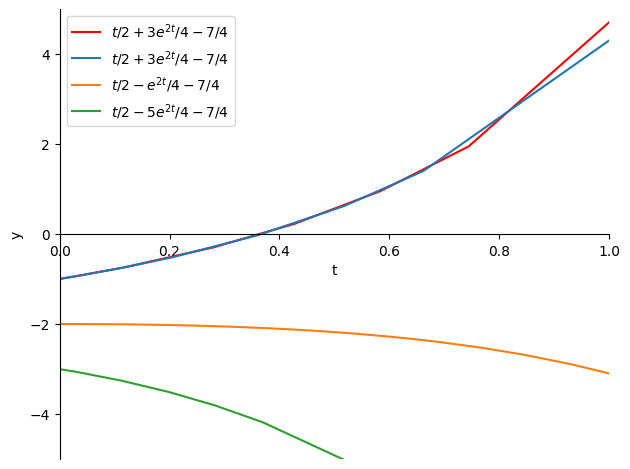

In [10]:
eq1sol1 = sym.dsolve(eq1, y(t), ics={y(0):-1})
eq1sol2 = sym.dsolve(eq1, y(t), ics={y(0):-2})
eq1sol3 = sym.dsolve(eq1, y(t), ics={y(0):-3})

p = sym_plot.plot(
    eq1sol0.rhs, eq1sol1.rhs, eq1sol2.rhs, eq1sol3.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)

p[0].line_color = 'red'
p.show()

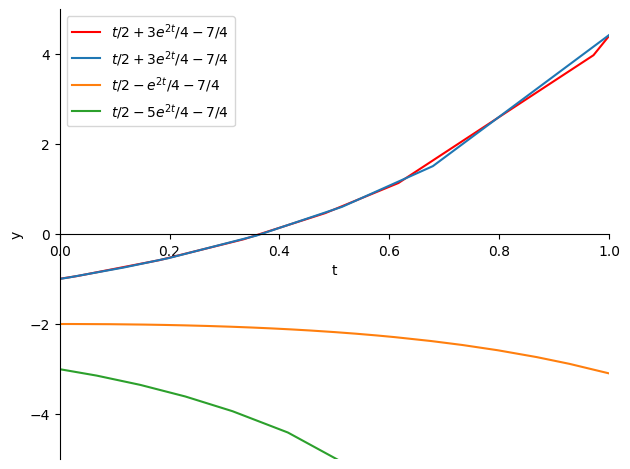

In [11]:
eq1sol1 = sym.dsolve(eq1, y(t), ics={y(0):-1})
eq1sol2 = sym.dsolve(eq1, y(t), ics={y(0):-2})
eq1sol3 = sym.dsolve(eq1, y(t), ics={y(0):-3})

p = sym_plot.plot(
    eq1sol0.rhs, eq1sol1.rhs, eq1sol2.rhs, eq1sol3.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)

p[0].line_color = 'red'
p.show()

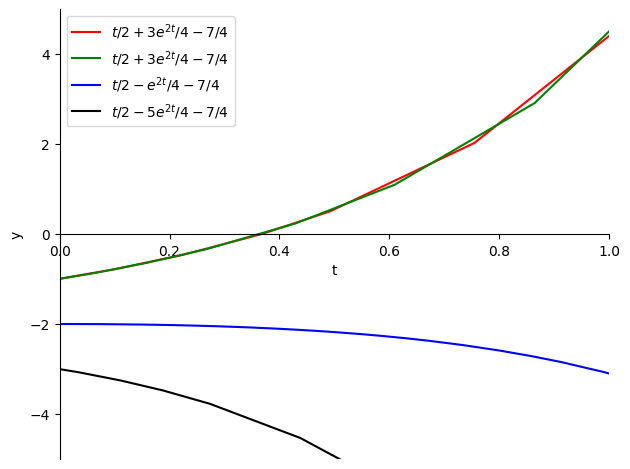

In [12]:
eq1sol1 = sym.dsolve(eq1, y(t), ics={y(0):-1})
eq1sol2 = sym.dsolve(eq1, y(t), ics={y(0):-2})
eq1sol3 = sym.dsolve(eq1, y(t), ics={y(0):-3})

p = sym_plot.plot(
    eq1sol0.rhs, eq1sol1.rhs, eq1sol2.rhs, eq1sol3.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)

p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'blue'
p[3].line_color = 'black'

p.show()

<div class="alert alert-info">
    <h3>Exercise 1.1</h3>
    <p>Solve the ODEs in Q1 of the Refresher problems worksheet, and plot the solutions over sensible ranges.</p>

<p><span class="label label-primary">a</span> $y'=(3x^2-e^x)/(2y-4)$, $y(0)=1$,

<p><span class="label label-primary">b</span> $y'= 4(1+x)(1+y^2)$, $y(0)=0$,

<p><span class="label label-primary">c</span> $y'= y(1-y)$, $y(0)=1/2$.

</div>

_Hints: For (a) you will need to use the line `from sympy import exp` to make the `exp` function available, and for (b) you may find it helpful to set the `ylim` of the plot._

In [13]:
%reset -f
# Standard setup
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot
import numpy as np

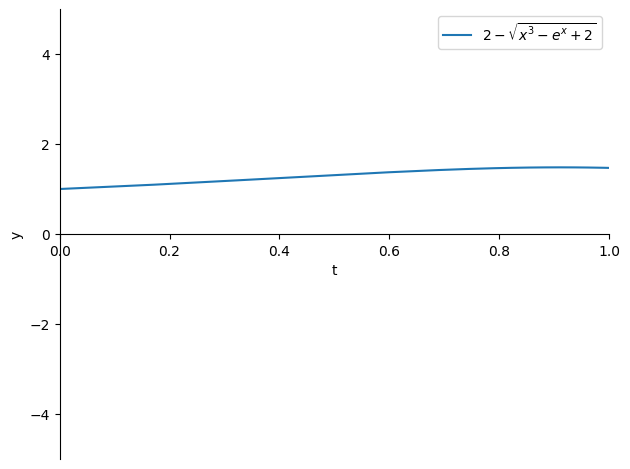

In [14]:
# Your code here for (a)
# Note: use the variable name eq1a_sol for the solution to the system
x = sym.symbols('x')
y = sym.Function('y')
p1_1 = sym.Eq(y(x).diff(x), (3*x**2-sym.exp(x))/(2*y(x)-4))
p1_1_sol = sym.dsolve(p1_1, y(x), ics={y(0):1})

p = sym_plot.plot(
    p1_1_sol.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)
p.show()
eq1a_sol = p1_1_sol

In [15]:
# Autograder tests

f = sym.Lambda(x,eq1a_sol.rhs)
assert f(0) == 1
print("Success: your solution satisfies the initial condition!")


Success: your solution satisfies the initial condition!


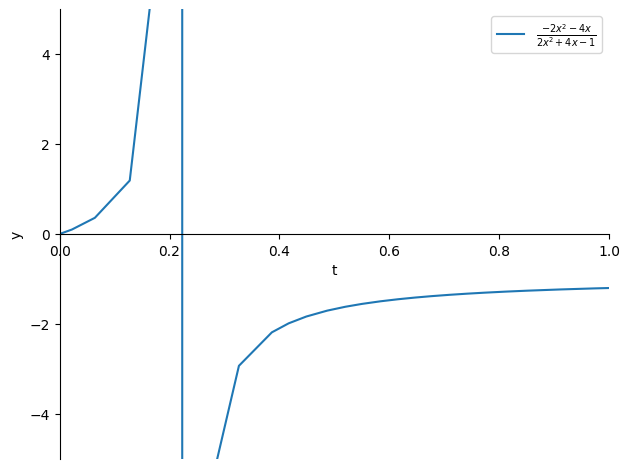

In [16]:
# Your code here for (b)
x = sym.symbols('x')
y = sym.Function('y')
p1_2 = sym.Eq(y(x).diff(x), 4*(1+x)*(1+y(x))**2)
eq1b_sol = sym.dsolve(p1_2, y(x), ics={y(0):0})

p = sym_plot.plot(
    eq1b_sol.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)
p.show()
# YOUR CODE HERE

In [17]:
# Autograder test

f = sym.Lambda(x,eq1b_sol.rhs)
assert f(0) == 0
print("Success: your solution satisfies the initial condition!")


Success: your solution satisfies the initial condition!


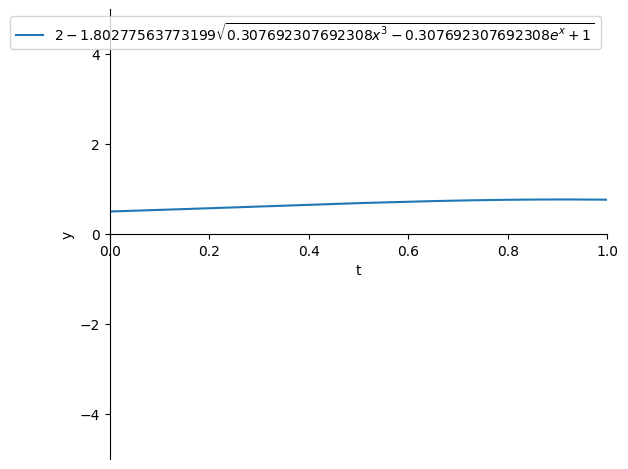

In [18]:
# Your code here for (c)
# YOUR CODE HERE
x = sym.symbols('x')
y = sym.Function('y')
p1_3 = sym.Eq(y(x).diff(x), y(x)*(1-y(x)))
eq1c_sol = sym.dsolve(p1_1, y(x), ics={y(0):1/2})

p = sym_plot.plot(
    eq1c_sol.rhs, 
    xlim=(0,1), ylim=(-5,5), xlabel = 't', ylabel = 'y', legend=True, show=False)
p.show()

In [19]:
# Autograder test
f = sym.Lambda(x,eq1c_sol.rhs)
assert f(0) == 1/2
print("Success: your solution satisfies the initial condition!")


Success: your solution satisfies the initial condition!


# 2. Symbolic solution of systems




We would also like to be able to solve systems of equations, for instance $$\mathbf{x}'=\begin{pmatrix}1 & 1\\ 4 & 1\end{pmatrix}\mathbf{x},$$
which appears as Example 2 in §7.5 of Boyce & DiPrima.

SymPy can handle this with just a simple modification of the code we've been using so far, if we rewrite the matrix equation as two equations in $x_1(t)$ and $x_2(t)$, where $\mathbf{x}(t)=\begin{pmatrix}x_1(t) \\ x_2(t)\end{pmatrix}$.

In [20]:
t = sym.symbols('t')
x1 = sym.Function('x1')
x2 = sym.Function('x2')
system = [sym.Eq(x1(t).diff(t), x1(t)+x2(t)),
          sym.Eq(x2(t).diff(t), 4*x1(t)+x2(t))]
print("The system")
display_latex(system)
system_sol = sym.dsolve(system)
print("has solution")
display_latex(system_sol)

The system


has solution


<span class="label label-danger">Task</span>
Check that this agrees with the solution given in the book: $$\mathbf{x}=c_1\begin{pmatrix}1\\2\end{pmatrix}e^{3t}+c_2\begin{pmatrix}1\\-2\end{pmatrix}e^{-t}$$

It's also worth noting that SymPy can give us the eigenvalues and eigenvectors for the matrix, which gives another way to find the solution of the system:

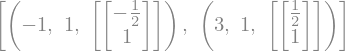

In [21]:
M = sym.Matrix([[1,1],[4,1]])
M.eigenvects()

<span class="label label-danger">Task</span>
What does this output tell us? (You may want to [check the documentation on eigenvects()](https://docs.sympy.org/latest/tutorial/matrices.html#eigenvalues-eigenvectors-and-diagonalization)) How does this relate to the solution given in the book?

The output is formatted thus:
    
    `[eigenvalue, multiplicity, [eigenvectors]]`

To make it easier to solve 2x2 systems like this, we can define a **function** that will take in a matrix defining the system, and give us back the corresponding system of equations.

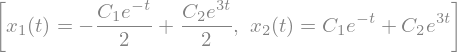

In [22]:
#
# Produce a function that takes in a 2x2 matrix,
# and returns the system of ODEs
#
def lin_system(M):
    '''
    Given a 2x2 SymPy Matrix, return the corresponding system of equations
    '''
    t = sym.symbols('t')
    x1 = sym.Function('x1')
    x2 = sym.Function('x2')
    system = [sym.Eq(x1(t).diff(t), M[0,0]*x1(t)+M[0,1]*x2(t)),
            sym.Eq(x2(t).diff(t), M[1,0]*x1(t)+M[1,1]*x2(t))]
    return(system)

sym.dsolve(lin_system(sym.Matrix([[1,1],[4,1]])))

This gives the same result as above, as expected.

Let's now use this method to investigate the systems in the Week 2 Tutorial sheet.

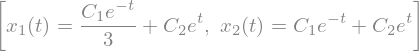

In [23]:
# 2(a)(i)
sym.dsolve(lin_system(sym.Matrix([[2,-1],[3,-2]])))

<span class="label label-danger">Task</span> Does this agree with what you found in the Tutorial?

The solution, although in different form, does agree. 

### Plotting solutions

We can also use SymPy to plot particular solutions. Here, we specifcy some initial conditions and use the [plot_parametric](https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot_parametric) function to plot the resulting solution for $-2\leq t\leq2$.

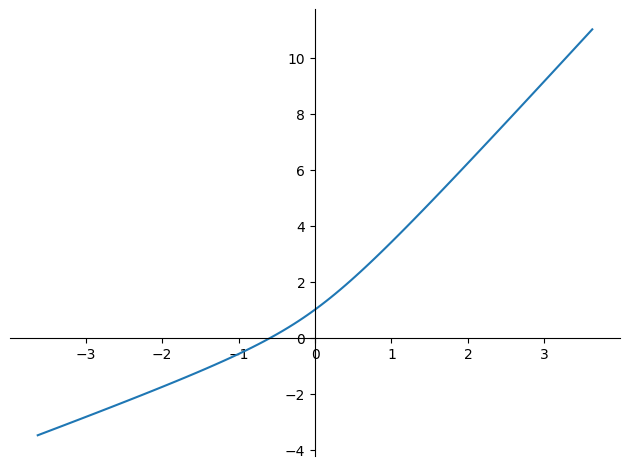

In [24]:
sol_2ai = sym.dsolve(lin_system(sym.Matrix([[2,-1],[3,-2]])),
                     ics={x1(0):0, x2(0):1})
display_latex((sol_2ai[0].rhs, sol_2ai[1].rhs))
import sympy.plotting as sym_plot
sym_plot.plot_parametric(sol_2ai[0].rhs, sol_2ai[1].rhs, (t,-2,2))

<span class="label label-danger">Task</span> Try adjusting the code above so that the solution is plotted over different ranges of $t$. Can you explain what you see, based on the form of the solution?

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>
    <p>The goal of this exercise is to solve some linear systems. But to do that efficiently, we will first create a function.</p>
    <p><span class="label label-primary">a</span> Complete the definition below of the function <code>solve_lin_system</code>. This function should take two arguments - a 2x2 matrix for a linear system, a list specifying initial conditions. It should return the particular solution associated with that system with those initial conditions. </p>
    <p><span class="label label-primary">b</span> Use your function, <code>solve_lin_system(sym.Matrix([[2,-1],[3,-2]]), [0,1])</code>, to replicate the results above and produce output like the following:</p>
    <p><img src="http://www.maths.ed.ac.uk/gkinnear/img/lin_system.png" width="300px"/></p> 
    <p><span class="label label-primary">c</span> Use the <code>solve_lin_system</code> function to solve these other systems from Tutorial 2, Q2(a):</p>

**i.** $\mathbf{x}'=\begin{pmatrix}-2 & 1\\ 1 & -2\end{pmatrix}\mathbf{x}$,

**ii.** $\mathbf{x}'=\begin{pmatrix}4 & -3\\ 8 & -6\end{pmatrix}\mathbf{x}$.

   <p>Make some plots trying different initial conditions and time ranges, and make sure the output makes sense to you.</p>
</div>

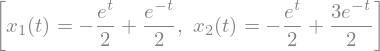

In [25]:
# Your code here for (a)

def solve_lin_system(M, ics=-1):
    '''
    This function should take two arguments - a 2x2 matrix for a linear system
    and a list specifying initial conditions It should return the particular
    solution for that system with those ICs.
    
    If ics is provided as matrix, the particular solution is returned
    is not ics is provided, the general solution is returned
    '''
    t = sym.symbols('t')
    x1 = sym.Function('x1')
    x2 = sym.Function('x2')
    system = [sym.Eq(x1(t).diff(t), M[0,0]*x1(t)+M[0,1]*x2(t)),
            sym.Eq(x2(t).diff(t), M[1,0]*x1(t)+M[1,1]*x2(t))]
    
    if (ics == -1):
        res = sym.dsolve(system)
    else:
        res = sym.dsolve(system,
                     ics={x1(0):ics[0], x2(0):ics[1]})
    return res

solve_lin_system(sym.Matrix([[2,-1],[3,-2]]), [0,1])

In [26]:
# Autograder test
sls = solve_lin_system(sym.Matrix([[2,-1],[3,-2]]), [0,1])
psol1 = sym.Lambda(t,sls[0].rhs)
psol2 = sym.Lambda(t,sls[1].rhs)
assert (psol1(0), psol2(0)) == (0, 1)
print("Success: the solution from your function satisfies the ICs!")


Success: the solution from your function satisfies the ICs!


Linear System with Matrix


General Solution


Particular solution starting at [0, 1]


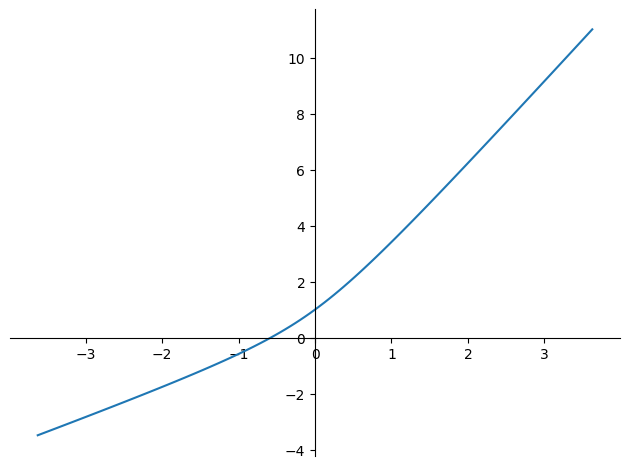

In [27]:
# Your code here for (b)
eq2_b_sol_p = solve_lin_system(sym.Matrix([[2,-1],[3,-2]]), [0,1])
eq2_b_sol_g = solve_lin_system(sym.Matrix([[2,-1],[3,-2]]), [0,1])
sym.init_printing(use_unicode=True)
print("Linear System with Matrix")
display_latex(sym.Matrix([[2,-1],[3,-2]]))

print("General Solution")
display_latex(eq2_b_sol_g)

print("Particular solution starting at [0, 1]")
sym_plot.plot_parametric(eq2_b_sol_p[0].rhs, eq2_b_sol_p[1].rhs, (t,-2,2))


General Solution


Particular solution starting at [3, 1]


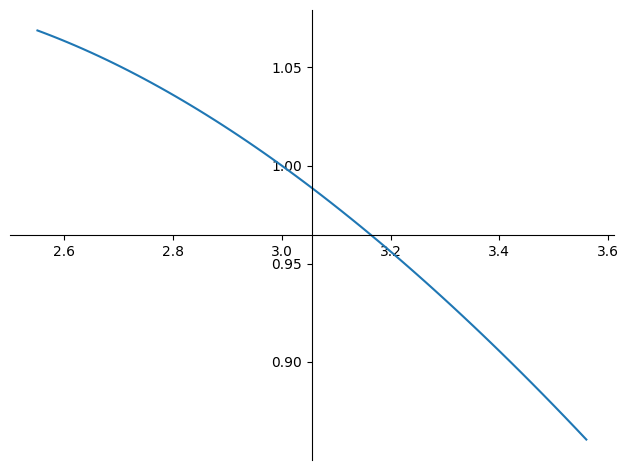

In [28]:
# Your code here for (c)(i)

# YOUR CODE HERE
eq2_b_sol_g = solve_lin_system(sym.Matrix([[-2,1],[1,-2]]))
print("General Solution")
display_latex(eq2_b_sol_g)

eq2_b_sol_p = solve_lin_system(sym.Matrix([[-2,1],[1,-2]]), [3,1])
print("Particular solution starting at [3, 1]")
display_latex(eq2_b_sol_p)
sym_plot.plot_parametric(eq2_b_sol_p[0].rhs, eq2_b_sol_p[1].rhs, (t,-0.1,0.1))

General Solution


Particular solution starting at [3, 1]


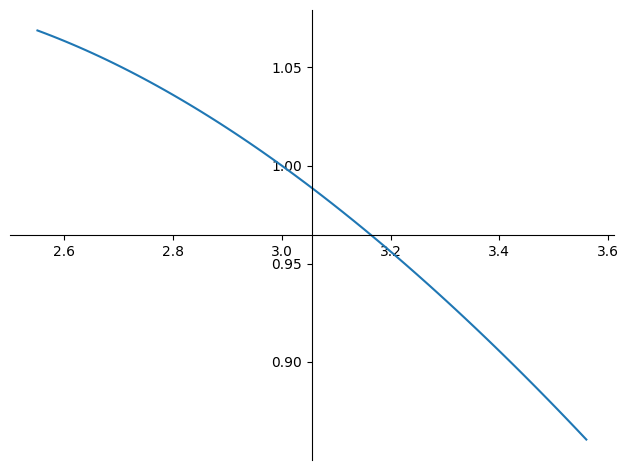

In [29]:
# Your code here for (c)(ii)

# YOUR CODE HERE
# Your code here for (c)(i)

eq2_b_sol_g = solve_lin_system(sym.Matrix([[4,-3],[8, -6]]))
print("General Solution")
display_latex(eq2_b_sol_g)

eq2_b_sol_p = solve_lin_system(sym.Matrix([[-2,1],[1,-2]]), [3,1])
print("Particular solution starting at [3, 1]")
display_latex(eq2_b_sol_p)
sym_plot.plot_parametric(eq2_b_sol_p[0].rhs, eq2_b_sol_p[1].rhs, (t,-0.1,0.1))

### Challenge: simplifying complex expressions using `map`

In Workshop 2, the final part of Q2(a) has a system with complex coefficients:

$$\mathbf{x}'=\begin{pmatrix}2 & 2+i\\ -1 & -1-i\end{pmatrix}\mathbf{x}.$$

To deal with complex numbers, we need to enter $i$ as `sym.I`. The solution provided by `sym.dsolve` looks surprisingly complicated!

In [30]:
M_2aiv = sym.Matrix([[2, 2+sym.I],[-1, -1-sym.I]])
sym.dsolve(lin_system(M_2aiv))

This is because there are expressions involving $i$ which need to be expanded and simplified. To see how to do that, notice that in this simpler example, the first entry of `exprs` is not automatically expanded and simplified:

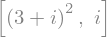

In [31]:
exprs = [(sym.I+3)**2, sym.I]
exprs

We can use the `expand` function to get SymPy to expand out the brackets and simplify:

In [32]:
exprs[0].expand()

To do this to all entries of exprs at once, we can use the `map` function:

In [33]:
list(map(sym.expand, exprs))

This takes the `sym.expand` function and applies it to each entry in `exprs`.

<div class="alert alert-info">
    <h3>Exercise 2.2</h3>
    <p>Make use of <code>map</code> to find the general solution to the system above (Q2(a)(iv) from Tutorial 2).</p>
    <p>Compare your results with the solution you computed by hand. <i>Hint:</i> recall from above that the <code>eigenvects()</code> function can give another way to see the solutions.</p>
</div>

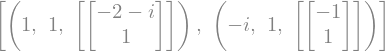

In [34]:
# Your code here
# Use the variable name sol_2aiv for the list

M_2aiv = sym.Matrix([[2, 2+sym.I],[-1, -1-sym.I]])
res = sym.dsolve(lin_system(M_2aiv))
sol_2aiv = list(map(sym.expand, res));
display_latex(res)
M_2aiv.eigenvects()

# this result is equivalent to the solution computed by hand, but in a different form.

In [35]:
# Autograder test
assert len(sol_2aiv) == 2
print("Success: the list has the right dimensions!")


Success: the list has the right dimensions!


# 3. Numerical solution of ODEs

Solving ODEs symbolically is not always possible, but we can use numerical methods to compute approximate solutions.

We will make use of several pacakges to do this:

* [SciPy](https://docs.scipy.org/doc/scipy/reference/index.html) provides numerical methods for solving ODEs, in particular the [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) function.

* [NumPy](https://www.numpy.org/) provides useful tools for doing numerical calculations.

* [Matplotlib](https://matplotlib.org/) is a widely-used library that produces plots from numerical data.

The following chunk of code gets all of this set up:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

Note that `%matplotlib notebook` makes the plots appear in an interactive window, with controls for zooming. Before moving on to the next plot, you should click the "power" icon in the top right of the plot, to close the interactive interface (if you don't do this, then the next plot will overwrite this one).

***
### Example
To illustrate the method, let's return to the ODE we considered right at the start: $$\frac{dy}{dt}-2y=4-t.$$
***

To use [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), we need to write a Python function that takes in $y$ and $t$ and returns $\frac{dy}{dt}$. Rearranging the ODE, we have $$\frac{dy}{dt}=4-t+2y$$ which we implement as follows:

In [37]:
def dy_dt(y, t):
    return(4-t+2*y)

Next we define the initial condition `y0` and set up an array of equally-spaced points between 0 and 2 (which we call `t`). We then pass all of these ingredients to the `odeint` function, which returns the solution.

In [46]:
y0 = 0
t = np.linspace(0, 2, 50)
sol = odeint(dy_dt, y0, t)

[[0.        ]
 [0.04080502]
 [0.08154207]
 [0.12214348]
 [0.16254197]
 [0.20267094]
 [0.24246471]
 [0.28185866]
 [0.32078953]
 [0.35919559]
 [0.3970168 ]
 [0.43419502]
 [0.47067421]
 [0.50640058]
 [0.5413227 ]
 [0.57539176]
 [0.60856161]
 [0.64078889]
 [0.67203315]
 [0.70225697]
 [0.731426  ]
 [0.75950904]
 [0.7864781 ]
 [0.81230844]
 [0.8369786 ]
 [0.86047039]
 [0.88276885]
 [0.90386232]
 [0.92374237]
 [0.94240373]
 [0.95984429]
 [0.97606498]
 [0.99106972]
 [1.00486535]
 [1.01746147]
 [1.02887041]
 [1.03910707]
 [1.04818879]
 [1.05613527]
 [1.06296839]
 [1.06871207]
 [1.07339217]
 [1.0770363 ]
 [1.07967368]
 [1.08133502]
 [1.08205233]
 [1.08185878]
 [1.08078856]
 [1.07887673]
 [1.07615905]]


<span class="label label-danger">Task</span> Using either a new notebook cell or just adding an extra line to the one above, print out the value of `sol` so you can see what form it takes.

We can then use the [Matplotlib plot function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) to produce a plot of the solution:

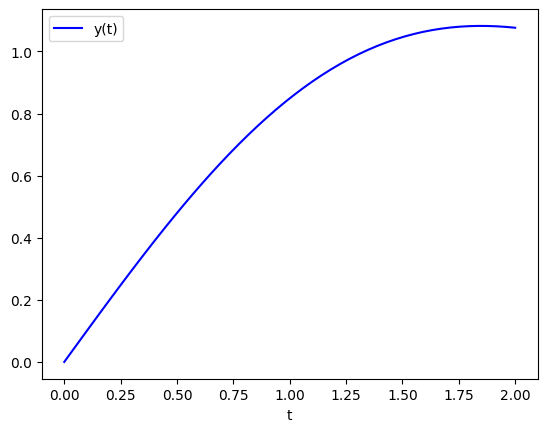

In [50]:
%matplotlib notebook
%matplotlib inline
plt.plot(t, sol, 'b', label='y(t)') # 'b' is a way of specifying the line colour
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

***
### Example
$$2y'+ty=2$$

This is Example 5 in §2.1 of Boyce & DiPrima (pp38-39).
***
It turns out that SymPy _can_ solve this system, though it requires the use of a "special function", i.e. not one of the standard functions like $\exp$, $\sin$, $\cos$.

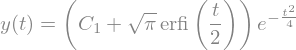

In [51]:
t = sym.symbols('t')
y = sym.Function('y')
sym.dsolve(sym.Eq(2*y(t).diff(t)+t*y(t),2))

We can use the `odeint` numerical solver to produce graphs of several different particular solutions – this replicates Figure 2.1.4 from Boyce & DiPrima:

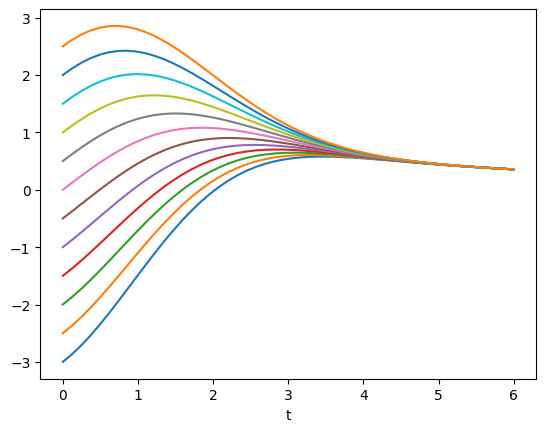

[-2.         -1.66666667 -1.33333333 -1.         -0.66666667 -0.33333333
  0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]


In [58]:
def dy_dt(y, t):
    return(1-t*y/2)

t = np.linspace(0, 6, 50)

for y0 in np.arange(-6, 6)/2:
    sol = odeint(dy_dt, y0, t)
    plt.plot(t, sol)

plt.xlabel('t')
plt.show()


<span class="label label-danger">Task</span> In the code above, do you understand `np.arange(-6, 6)/2`? Check what happens if you remove the `/2`.

<div class="alert alert-info">
    <h3>Exercise 3.1</h3>
    <p>Use the <code>odeint</code> numerical solver to show particular solutions of $$y'+\tfrac12y=\tfrac12 e^{t/3},$$ with $y(0)\in\left\{-2,-1,0,1,2,3,4\right\}$. (Note: this is replicating Figure 2.1.1 from p34 of Boyce &amp; DiPrima.)</p>
</div>

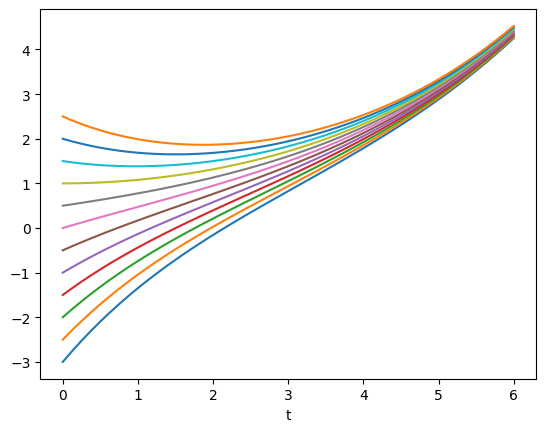

In [53]:
# YOUR CODE HERE
def dy_dt(y, t):
    return -y/2 + np.exp(t/3)/2

t = np.linspace(0, 6, 50)

for y0 in np.arange(-6, 6)/2:
    sol = odeint(dy_dt, y0, t)
    plt.plot(t, sol)

plt.xlabel('t')
plt.show()


# 4. Numerical solution of systems of ODEs

We will return to this in later labs, once we start studying nonlinear systems. For those, numerical methods are particularly important because the symbolic solutions are either complicated or impossible to compute.

For now, we will look at a linear system, just to demonstrate the method:

***
### Example
Plot the solution of the system $$\mathbf{x}'=\begin{pmatrix}-\frac12 & 1\\ -1 & -\frac12\end{pmatrix}\mathbf{x},$$
with initial condition $(-2, -3)$. This appears as Example 1 in §7.6 of Boyce & DiPrima.
***

Translating the notation into something sensible in Python is the hard part here. We will use `X = [x1,x2]` to represent the vector $\mathbf{x}$, so `dX_dt` represents $\mathbf{x}'$. This is a function of `X` and the underlying time parameter `t`, which we encode in Python as follows:

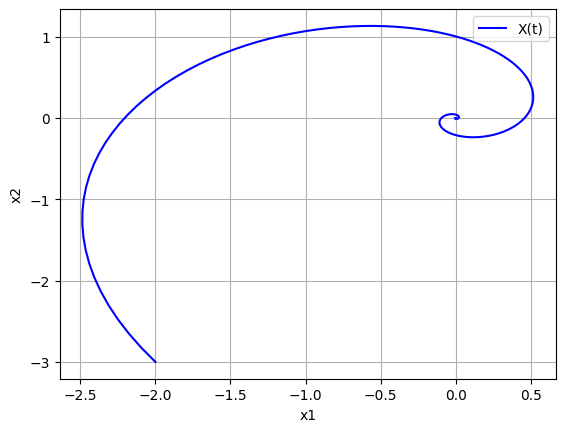

In [61]:
# Define the equation
def dX_dt(X, t):
    x1, x2 = X
    return [-0.5*x1+x2, -x1-0.5*x2]

# Initial conditions
X0 = [-2, -3]

# Set up the time samples
t = np.linspace(0, 50, 1000)

# Solve
Xsol = odeint(dX_dt, X0, t)

# Plot the (x1, x2) coordinates of the solution
plt.plot(Xsol[:, 0], Xsol[:, 1], 'b', label='X(t)')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

<span class="label label-danger">Task</span> Try adjusting the values in `np.linspace(0, 5, 100)` to see the effect on the plot. First try `np.linspace(0, 50, 100)`, then see if you can find a good choice of time interval and number of steps so that the plot gives a good representation of the behaviour.

Here we add several different trajectories to the plot, each with a different initial condition:

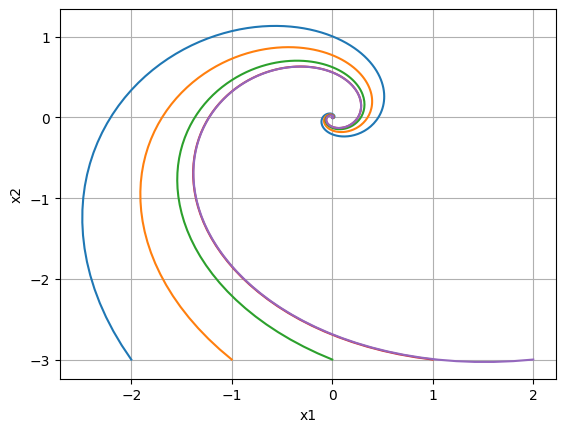

In [62]:
# Define the equation
def dX_dt(X, t):
    x1, x2 = X
    return [-0.5*x1+x2, -x1-0.5*x2]

# Set up the time samples
t = np.linspace(0, 50, 1000)

for x0 in np.arange(-2,3):
    # Initial conditions
    X0 = [x0, -3]
    
    # Solve
    Xsol = odeint(dX_dt, X0, t)
    
    # Plot the (x1, x2) coordinates of the solution
    plt.plot(Xsol[:, 0], Xsol[:, 1])

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

<div class="alert alert-info">
    <h3>Exercise 4.1</h3>
    <p>Use a similar method to show particular solutions of $$\mathbf{x}'=\begin{pmatrix}-3 & \sqrt{2}\\ \sqrt{2} & -2\end{pmatrix}\mathbf{x},$$ with initial conditions $x_1=2$ and $x_2\in\{-3, -2.5, \ldots, 1.5, 2\}$. (Note: this is replicating some features of Figure 7.5.4 from p402 of Boyce &amp; DiPrima.)</p>
</div>

array([[ 2.00000000e+00,  2.00000000e+00],
       [ 1.85057429e+00,  1.93898423e+00],
       [ 1.71783953e+00,  1.87430298e+00],
       ...,
       [-3.74337119e-12, -5.27958923e-12],
       [-3.73933219e-12, -5.27389296e-12],
       [-3.73529320e-12, -5.26819668e-12]])

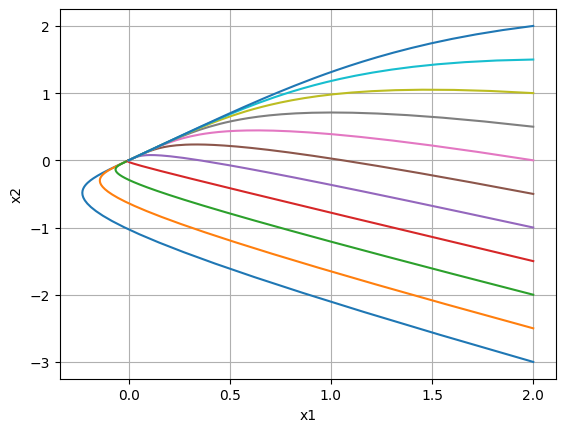

In [71]:
# Your code here.
#To pass the autograding, you should define the equation in a function called dX_dt (as above).

def dX_dt(X, t):
    x1, x2 = X
    return [-3*x1+np.sqrt(2)*x2, np.sqrt(2)*x1-2*x2]

# Set up the time samples
t = np.linspace(0, 50, 1000)

for x0 in np.arange(-3,2.1,0.5):
    # Initial conditions
    X0 = [2, x0]
    
    # Solve
    Xsol = odeint(dX_dt, X0, t)
    
    # Plot the (x1, x2) coordinates of the solution
    plt.plot(Xsol[:, 0], Xsol[:, 1])

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [65]:
# Autograder test
assert dX_dt([0,0],0) == [0,0]
assert list(map(lambda x: np.round(x,3), dX_dt([2,2],0))) == [-3.172, -1.172]
print("Success: your ODE function seems to match!")


Success: your ODE function seems to match!


We will continue to develop these methods in the next couple of labs, so that ultimately we can produce informative phase portraits to help our understanding of the differential equations in the course.